# Load Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [16]:
data = pd.read_csv("deceptive-opinion.csv", usecols=['polarity','text'])
data.head(10)

,polarity,text
0,positive,We stayed for a one night getaway with family ...
1,positive,Triple A rate with upgrade to view room was le...
2,positive,This comes a little late as I'm finally catchi...
3,positive,The Omni Chicago really delivers on all fronts...
4,positive,I asked for a high floor away from the elevato...
5,positive,I stayed at the Omni for one night following a...
6,positive,We stayed in the Conrad for 4 nights just befo...
7,positive,Just got back from 2 days up in Chicago shoppi...
8,positive,We arrived at the Omni on 2nd September for a ...
9,positive,"On our visit to Chicago, we chose the Hyatt du..."


In [27]:
# Convert text to lower case
data['text'] = data['text'].str.lower()
# Estimate lenght of text review
data['long_text'] = data['text'].str.split().str.len()
data.head(10)
     

,polarity,text,long_text
0,positive,we stayed for a one night getaway with family ...,105
1,positive,triple a rate with upgrade to view room was le...,45
2,positive,this comes a little late as i'm finally catchi...,207
3,positive,the omni chicago really delivers on all fronts...,127
4,positive,i asked for a high floor away from the elevato...,72
5,positive,i stayed at the omni for one night following a...,183
6,positive,we stayed in the conrad for 4 nights just befo...,118
7,positive,just got back from 2 days up in chicago shoppi...,131
8,positive,we arrived at the omni on 2nd september for a ...,164
9,positive,"on our visit to chicago, we chose the hyatt du...",86


In [28]:
# Get Vocabulary
def vocabulary(pandas_series):
    lista_palabras = " ".join(sec for sec in pandas_series).split(" ")
    x = Counter(lista_palabras)

    return [i for i,_ in x.most_common() ]

In [29]:
vocabulary_words = vocabulary(data['text'])
vocabulary_words

['the',
 'and',
 'to',
 'a',
 'i',
 'was',
 'in',
 'of',
 'we',
 'for',
 'hotel',
 'at',
 'my',
 'it',
 'room',
 'is',
 'that',
 'with',
 'were',
 'not',
 'had',
 'this',
 'on',
 'our',
 'they',
 'but',
 'very',
 'have',
 'stay',
 'you',
 'be',
 'as',
 'there',
 'from',
 'chicago',
 'when',
 'would',
 'so',
 'are',
 'all',
 'staff',
 'great',
 'me',
 'stayed',
 'an',
 'one',
 'service',
 'no',
 'if',
 'like',
 'rooms',
 'get',
 'will',
 '\n',
 'just',
 'out',
 'up',
 'about',
 'or',
 'us',
 'after',
 'even',
 'could',
 'did',
 'by',
 'only',
 'hotel.',
 'which',
 'desk',
 'time',
 'got',
 '-',
 'front',
 'nice',
 'what',
 'their',
 'been',
 'some',
 'also',
 'night',
 'more',
 'location',
 'next',
 'than',
 'here',
 'room.',
 'other',
 'good',
 'first',
 'bed',
 'because',
 'really',
 'back',
 'two',
 'never',
 'made',
 "didn't",
 'place',
 'recommend',
 'has',
 'go',
 'staying',
 'your',
 'while',
 'chicago.',
 'can',
 'do',
 'bathroom',
 'room,',
 'business',
 'check',
 'any',
 'he',

In [ ]:
# Get vocabulary  Unique words
len(vocabulary_words)

17925

In [32]:
#Map words to tokens

def get_dict_map(token_or_tag):
    if token_or_tag == 'token':
        # agregamos 'PAD_token' al vocabulario de tokens, para ser usado más
        # adelante a fin de que todas las oraciones tengan la misma cantidad de
        # tokens
        vocab = ['PAD_token'] + vocabulary(data['text'])
    elif token_or_tag == 'tag':
        vocab = vocabulary(data['Tags'])

    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map('token')
print(token2idx['PAD_token'])
print(len(token2idx))



     


0
17926


<Axes: >

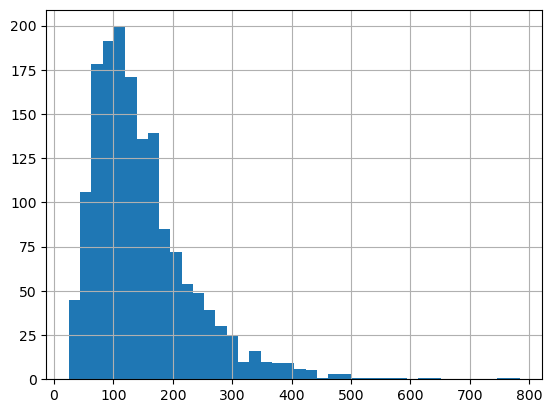

In [21]:
#Histogram with reviews lenght
data['long_text'].hist(bins=40) 

In [20]:
# Estimate percentiles
custom_percentiles = list(range(10, 101,10))
custom_percentile_values = np.percentile(data['long_text'], custom_percentiles)
percentile_table = pd.DataFrame({
    'Percentile': custom_percentiles,
    'Value': custom_percentile_values
})
print(percentile_table)

   Percentile  Value
0          10   63.0
1          20   81.0
2          30   97.0
3          40  112.0
4          50  128.0
5          60  147.0
6          70  171.0
7          80  203.0
8          90  260.0
9         100  784.0
